# Combined-Cycle Power Plant

### 1. Business Objective:
A Combined Cycle Power Plant comprises gas turbines,steam turbines and heat recovery steam generators. In this type of plant, the electricity is generated by gas and steam turbines combined in one cycle. Then it is transferred from one turbine to another. We have to model the energy generated as a function of exhaust vacuum and ambient variables and use that model to improve the plant's performance.

### 2. Data Set Details:
This is a project where the variable to be predicted is "energy production" The data file contains 9568 observations with five variables collected from a Combined Cycle Power Plant over six years when power plant was set to work with a full load.

### The Variables or Features
- temperature - in degrees Celsius
- exhaust_vaccum - in cm Hg
- amb_pressure(Ambient Pressure) - in millibar
- r_humidity(Relative humidity) - in percentage
- energy_production - in MW(Million watts) net hourly electrical energy output.

### 3. Dependent and Independent Variables

### Independent variable
Independent variable is also called Input variable and is denoted by X. In practical applications, independent variable is also called Feature variable or Predictor variable. We can denote it as: -

- Independent or Input variable (X) = Feature variable = Predictor variable. 

### Dependent variable
Dependent variable is also called Output variable and is denoted by y. Dependent variable is also called Target variable or Response variable. It can be denoted it as follows: -

- Dependent or Output variable (y) = Target variable = Response variable.

### 4. Import Necessary Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('c:/users/onkar/downloads/energy_production.csv', sep=';' )
df

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
...,...,...,...,...,...
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57


### 6. EDA

In [3]:
#It gives the number of rows and columns of the dataset
df.shape

(9568, 5)

In [4]:
#shows the null values
df.isnull().sum()

temperature          0
exhaust_vacuum       0
amb_pressure         0
r_humidity           0
energy_production    0
dtype: int64

In [5]:
#Data types of each feature/column
df.dtypes

temperature          float64
exhaust_vacuum       float64
amb_pressure         float64
r_humidity           float64
energy_production    float64
dtype: object

In [6]:
#Shows the overall information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature        9568 non-null   float64
 1   exhaust_vacuum     9568 non-null   float64
 2   amb_pressure       9568 non-null   float64
 3   r_humidity         9568 non-null   float64
 4   energy_production  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [7]:
#To get the descriptive statistics of the dataset
df.describe()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [8]:
#Checking whether the dataset contains the duplicates or not
df1=df[df.duplicated()]
df1.head()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
2066,10.72,41.17,1019.68,60.71,479.21
2780,28.41,75.60,1018.48,56.07,440.28
3333,24.79,75.60,1017.07,68.23,440.05
3467,7.64,41.17,1020.01,75.14,488.53
3550,25.42,75.60,1017.39,77.63,438.24


In [9]:
#Returns the count of duplicates
df1.shape

(41, 5)

In [10]:
#Droping the duplicates
df2=df.drop_duplicates()
df2

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
...,...,...,...,...,...
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57


In [11]:
#Shape of the dataset after removing the duplicated rows
df2.shape

(9527, 5)

#### No Auto correlation

In [12]:
#Multiple linear regression assumes that none of the predictor variables(X) are highly correlated 
#with each other.
corr_matrix=df.corr()
corr_matrix

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
temperature,1.000000,0.844107,-0.507549,-0.542535,-0.948128
exhaust_vacuum,0.844107,1.000000,-0.413502,-0.312187,-0.869780
amb_pressure,-0.507549,-0.413502,1.000000,0.099574,0.518429
r_humidity,-0.542535,-0.312187,0.099574,1.000000,0.389794
energy_production,-0.948128,-0.869780,0.518429,0.389794,1.000000


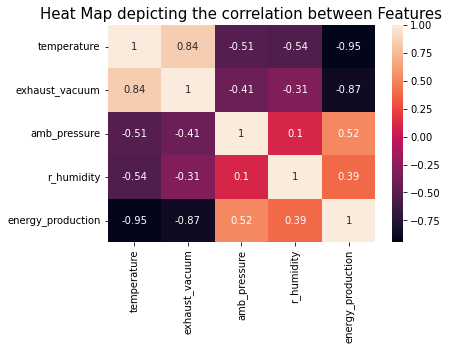

In [13]:
sns.heatmap(df.corr(),annot=True)
plt.title("Heat Map depicting the correlation between Features",size = 15);

In [14]:
corr_matrix['energy_production'].sort_values(ascending=False)

energy_production    1.000000
amb_pressure         0.518429
r_humidity           0.389794
exhaust_vacuum      -0.869780
temperature         -0.948128
Name: energy_production, dtype: float64

### Interpretation of correlation coefficient
- The correlation coefficient ranges from -1 to +1.
- When it is close to +1, this signifies that there is a positive correlation. So, we can see that there is a strong positive correlation between energy_production and amb_pressure
- When it is clsoe to -1, it means that there is a strong negative correlation. So, we can see that there is strong negative correlation between energy_production and exhaust_vacuum, temperature.

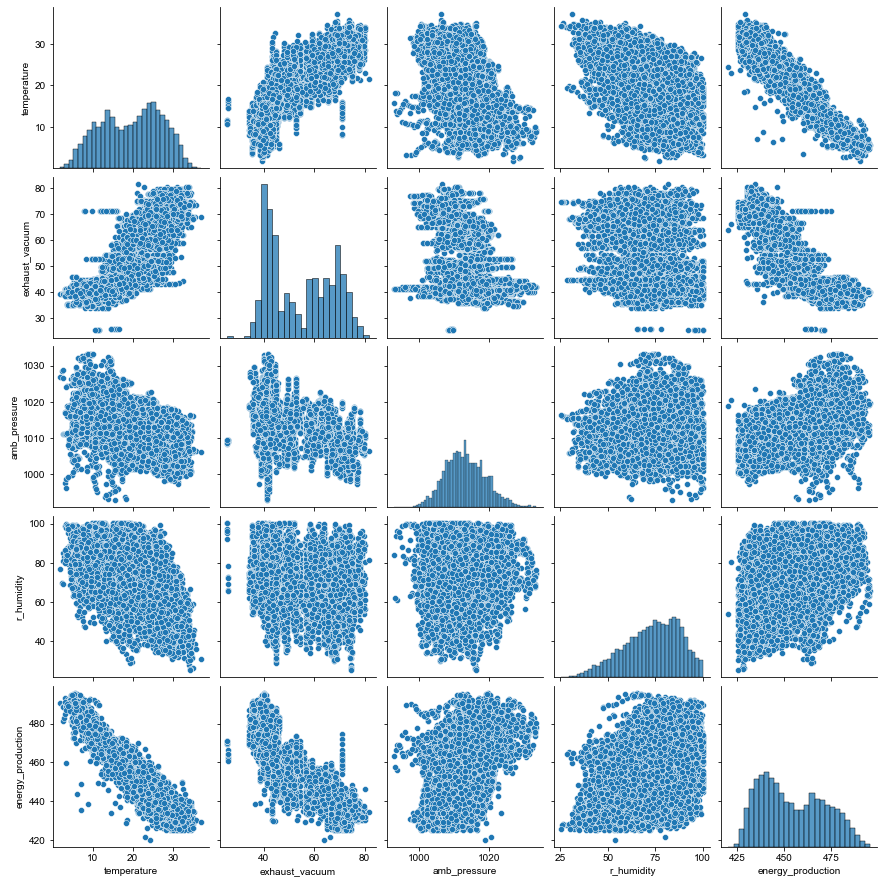

In [15]:
sns.pairplot(df)
sns.set_theme(style='darkgrid')

### Observation:
 - Exhaust_vaccum and temperature are highly correalated in predictors(Multi collinearity occurs)
 - As Temperature increases, Energy production decreases ( Temperature & Energy Production are Inversely proportional)Negatively correlated
 - As Exhaust_vacuum increases, Energy production decreases ( Exhaust_vacuum & Energy production are Inversely proportional)Negatively correlated.

### Outliers Detection

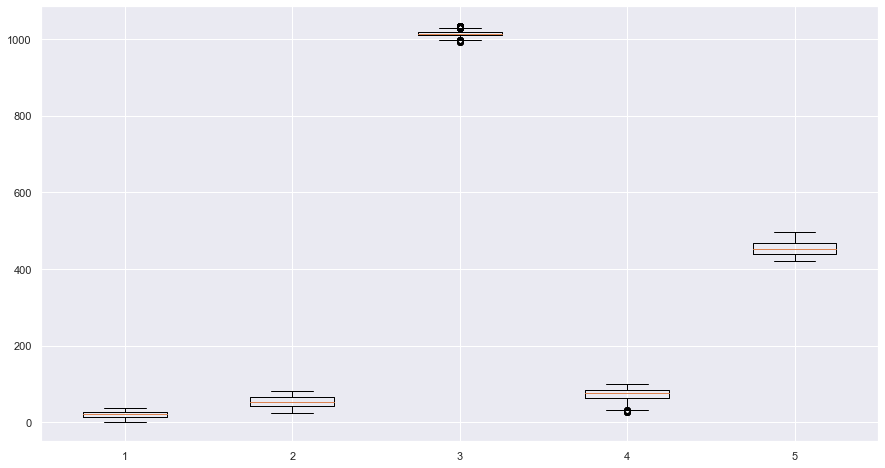

In [16]:
#boxplot for all features
plt.figure(figsize=(15,8))
plt.boxplot(df2,vert=True)
plt.show()

#### 1. Temperature

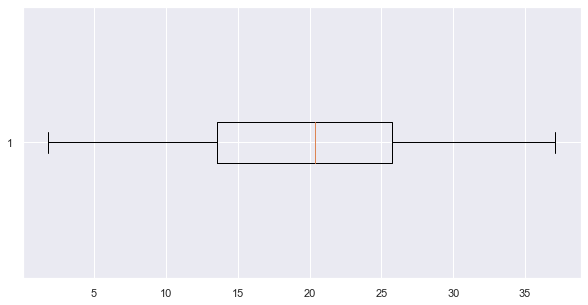

In [17]:
plt.figure(figsize=(10,5))
plt.boxplot(df2['temperature'],vert=False)
plt.show()

#### 2.Exhaust_vacuum

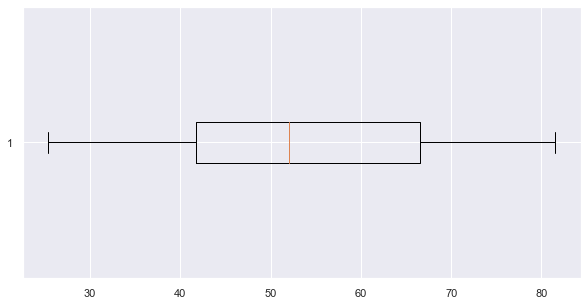

In [18]:
plt.figure(figsize=(10,5))
plt.boxplot(df2['exhaust_vacuum'],vert=False)
plt.show()

#### 3.Ambient_pressure

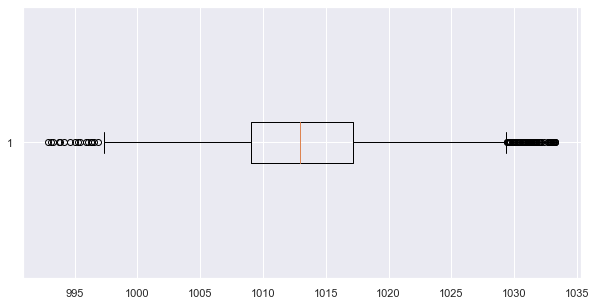

In [19]:
plt.figure(figsize=(10,5))
plt.boxplot(df2['amb_pressure'],vert=False)
plt.show()

#### 4.Relative_humidity

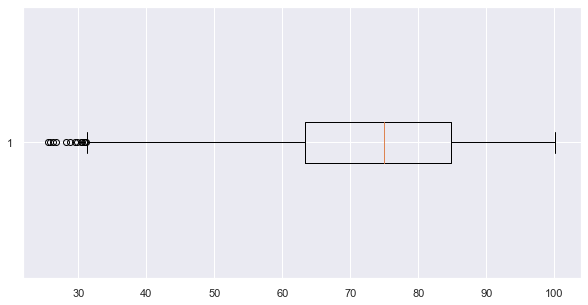

In [20]:
plt.figure(figsize=(10,5))
plt.boxplot(df2['r_humidity'],vert=False)
plt.show()

#### 5.Energy_production

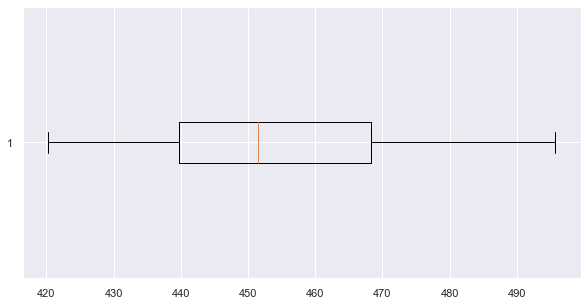

In [21]:
plt.figure(figsize=(10,5))
plt.boxplot(df2['energy_production'],vert=False)
plt.show()

### Observation:
#### 2 features are having outliers present in it From the 5 features

1. temperature
2.exhaust_vacuum
3.amb_pressure(Outliers)
4.r_humidity(Outliers)
5.energy_production

#### amb_pressure(Outliers)

In [22]:
Q1 = df2.amb_pressure.quantile(0.25)
Q3 = df2.amb_pressure.quantile(0.75)
Q1,Q3

(1009.085, 1017.2)

In [23]:
IQR = Q3-Q1
print(IQR)

8.115000000000009


In [24]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
lower_limit , upper_limit

(996.9125, 1029.3725)

In [25]:
df2[(df2.amb_pressure<lower_limit)|(df2.amb_pressure>upper_limit)]

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
38,9.95,41.82,1033.09,69.44,477.52
175,9.06,41.92,1029.90,90.88,473.37
315,14.46,42.86,1031.34,69.84,464.44
319,14.58,41.92,1030.42,61.96,462.69
385,14.20,42.86,1031.96,69.59,468.63
...,...,...,...,...,...
9093,9.42,41.40,1030.38,87.80,472.99
9125,7.66,41.92,1031.96,82.48,485.11
9331,5.97,36.25,1029.65,86.74,487.03
9368,14.31,42.86,1031.14,69.60,465.36


#### Inference:
So we have 91 outliers in ambient pressure

In [26]:
df2= df2[(df2.amb_pressure>lower_limit)&(df2.amb_pressure<upper_limit)]

<AxesSubplot:>

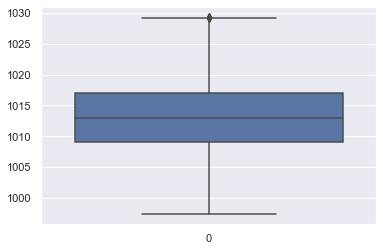

In [27]:
sns.boxplot(data=df2['amb_pressure'])

In [28]:
Q1 = df2.amb_pressure.quantile(0.25)
Q3 = df2.amb_pressure.quantile(0.75)
Q1,Q3

(1009.0675, 1017.08)

In [29]:
IQR = Q3-Q1
print(IQR)

8.012500000000045


In [30]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
lower_limit , upper_limit

(997.0487499999999, 1029.09875)

In [31]:
df2[(df2.amb_pressure<lower_limit)|(df2.amb_pressure>upper_limit)]

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
2539,13.92,44.47,1029.36,70.86,467.29
3290,9.42,41.40,1029.21,86.40,474.75
4027,9.45,41.92,1029.32,91.09,467.79
5624,9.39,40.11,1029.14,77.29,473.05
6582,14.01,42.74,1029.16,68.31,466.15
7438,8.72,36.25,1029.31,85.73,479.94
7593,9.09,41.92,1029.36,91.00,478.98


#### Inference:
Here again we got 7 outliers

In [32]:
df2= df2[(df2.amb_pressure>lower_limit)&(df2.amb_pressure<upper_limit)]

<AxesSubplot:>

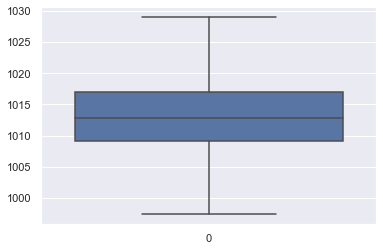

In [33]:
sns.boxplot(data=df2['amb_pressure'])

#### Observation:
So now those outliers are cleared

### r_humidity outliers

In [34]:
Q1 = df2.r_humidity.quantile(0.25)
Q3 = df2.r_humidity.quantile(0.75)
Q1,Q3

(63.25, 84.84)

In [35]:
IQR = Q3-Q1
print(IQR)

21.590000000000003


In [36]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
lower_limit , upper_limit

(30.864999999999995, 117.22500000000001)

In [37]:
df2[(df2.r_humidity<lower_limit)|(df2.r_humidity>upper_limit)]

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
30,33.94,74.67,1015.94,28.16,427.98
233,34.65,74.67,1016.03,26.67,427.69
400,35.01,74.67,1016.10,26.30,428.48
1154,34.30,74.67,1015.98,25.89,427.84
1254,19.78,44.71,1015.70,29.43,465.49
1814,19.31,44.71,1016.13,30.59,463.00
5674,33.83,67.90,1005.94,29.86,428.12
6048,34.18,67.90,1005.87,30.34,425.50
6214,19.32,44.71,1015.30,28.81,464.38
7287,18.76,44.71,1015.15,30.83,462.18


In [38]:
df2=df2[(df2.r_humidity>lower_limit)&(df2.r_humidity<upper_limit)]

<AxesSubplot:>

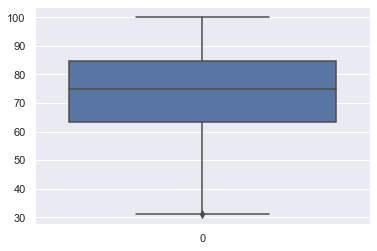

In [39]:
sns.boxplot(data=df2['r_humidity'])

#### Observation:
But here still we can see some outliers below 30

In [40]:
Q1 = df2.r_humidity.quantile(0.25)
Q3 = df2.r_humidity.quantile(0.75)
Q1,Q3

(63.3125, 84.8475)

In [41]:
IQR = Q3-Q1
print(IQR)

21.534999999999997


In [42]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
lower_limit , upper_limit

(31.010000000000005, 117.14999999999999)

In [43]:
df2[(df2.r_humidity<lower_limit)|(df2.r_humidity>upper_limit)]

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
5610,29.85,68.24,1007.01,30.99,433.43


In [44]:
df2 = df2[(df2.r_humidity>lower_limit)&(df2.r_humidity<upper_limit)]

<AxesSubplot:>

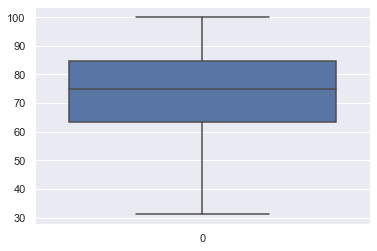

In [45]:
sns.boxplot(data=df2['r_humidity'])

In [46]:
df2

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
...,...,...,...,...,...
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57


#### Observation:
Original Dataset contains - Observations = 9568

After Removal of Duplicates(41) - Observations = 9527

After Removal of outliers - Observations = 9418

### 4. Assumptions of Linear Regression
 The Linear Regression model is based on several assumptions which are as follows:-

### 1. Normality Test
Skweness = 0 

Kurtosis = 0

#### Temperature

Text(0.5, 1.0, 'Normality Test - Temperature')

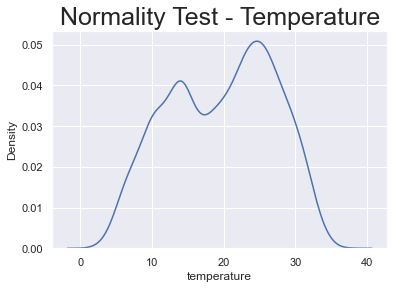

In [62]:
sns.distplot(df2['temperature'],hist=False)
plt.title('Normality Test - Temperature',size=25)

In [56]:
df2.temperature.skew()


-0.15407488954859153

In [58]:
df2.temperature.kurtosis()

-1.01983658909601

#### Exhuast Vaccuam

Text(0.5, 1.0, 'Normality Test - exhaust_vacuum')

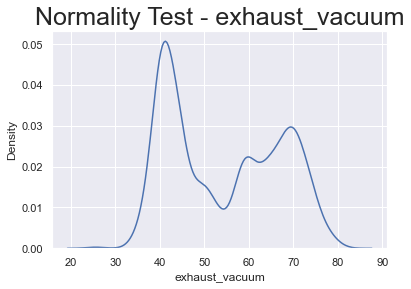

In [61]:
sns.distplot(df2['exhaust_vacuum'],hist=False)
plt.title('Normality Test - exhaust_vacuum',size=25)

In [63]:
df2.exhaust_vacuum.skew()

0.1794220882950822

In [64]:
df2.exhaust_vacuum.kurtosis()

-1.445425279530986

#### Ambient Pressure

Text(0.5, 1.0, 'Normality Test - amb_pressure')

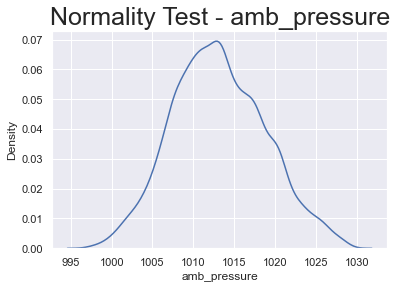

In [65]:
sns.distplot(df2['amb_pressure'],hist=False)
plt.title('Normality Test - amb_pressure',size=25)

In [66]:
df2.amb_pressure.skew()

0.16589542379343342

In [67]:
df2.amb_pressure.kurtosis()

-0.3025874381825897

#### Relative Humidity

Text(0.5, 1.0, 'Normality Test - r_humidity')

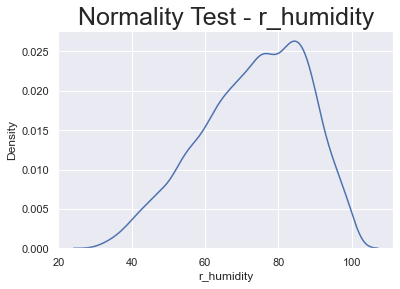

In [68]:
sns.distplot(df2['r_humidity'],hist=False)
plt.title('Normality Test - r_humidity',size=25)

In [69]:
df2.r_humidity.skew()

-0.4145111029300346

In [70]:
df2.r_humidity.kurtosis()

-0.5012806961206122

### Observation:
Normality Test Failed due to skewness and kurtosis is not exactly equal to Zero, 

but its under acceptable range

### Linearity Test

Text(0.5, 1.0, 'Linearity Test - Temperature')

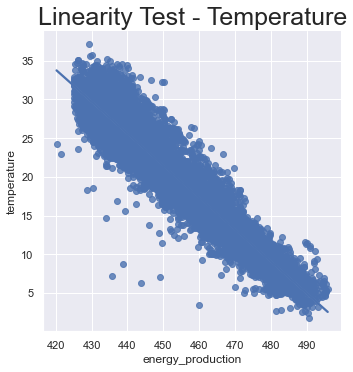

In [71]:
sns.lmplot(x='energy_production',y='temperature',data=df2)
plt.title('Linearity Test - Temperature',size=25)

Text(0.5, 1.0, 'Linearity Test - Exhaust_vacuum')

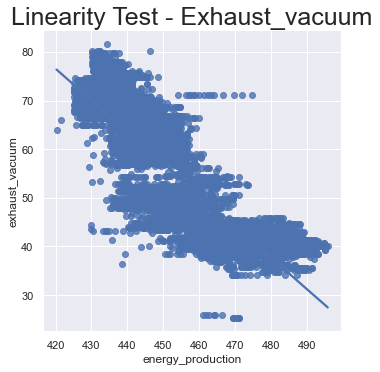

In [72]:
sns.lmplot(x='energy_production',y='exhaust_vacuum',data=df2)
plt.title('Linearity Test - Exhaust_vacuum',size=25)

Text(0.5, 1.0, 'Linearity Test - amb_pressure')

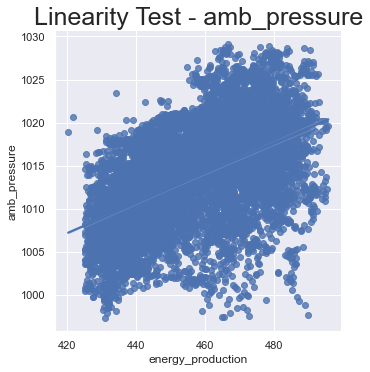

In [73]:
sns.lmplot(x='energy_production',y='amb_pressure',data=df2)
plt.title('Linearity Test - amb_pressure',size=25)

Text(0.5, 1.0, 'Linearity Test - r_humidity')

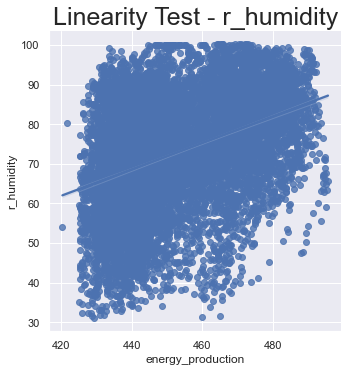

In [74]:
sns.lmplot(x='energy_production',y='r_humidity',data=df2)
plt.title('Linearity Test - r_humidity',size=25)

### Observation:
So our data is not following the linearity, there are outliers present in our data

### 3. No Auto Correlation:
There is a correlation coefficient between temperature and exhaust_vacuum.

### 4 . Autoregression test:
There are no time based inputs, so it is passed.

### 5. Homoscedasticity check || Residual Mean Check:
Will be performed after model building

#### Homoscedasticity check:
Should have same varaince (For homoscedasticity check all your input features must be in a similar scale) We have to pickup each and every feature and plot with respect to its error(error=y-y_pred)

#### Residual Mean Check:
All the points should fall on the best fit line (There should be Zero Error)

## 5. Model Building 

In [75]:
import statsmodels.formula.api as sm

In [77]:
model = sm.ols(formula='energy_production~temperature+exhaust_vacuum+amb_pressure+r_humidity',data=df2).fit()
model

In [78]:
model.params

Intercept         443.195167
temperature        -1.970523
exhaust_vacuum     -0.236359
amb_pressure        0.073345
r_humidity         -0.158030
dtype: float64

In [80]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      energy_production   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 3.021e+04
Date:                Thu, 24 Nov 2022   Prob (F-statistic):               0.00
Time:                        20:16:24   Log-Likelihood:                -27668.
No. Observations:                9417   AIC:                         5.535e+04
Df Residuals:                    9412   BIC:                         5.538e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        443.1952     10.258     43.206      0.000     423.088     463.302
temperature       -1.9705      0.015   -127.828      0.000      -2.001      -1.940
exhaust_vacuum    -0.2364      0.007    -32.232      0.000      -0.251      -0.222
amb_pressure       0.0733      0.010      7.363      0.000       0.054       0.093
r_humidity        -0.1580      0.004    -37.468      0.000      -0.166      -0.150
==============================================================================
Omnibus:                      885.871   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4066.097
Skew:                          -0.357   Prob(JB):                         0.00
Kurtosis:                       6.139   Cond. No.                     2.22e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.22e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Statsmodels gives accuracy of 92%

#### Splitting the data into Independent(X) & Dependent Variables(Y)

In [81]:
X=df2.iloc[:,0:4]
X

,temperature,exhaust_vacuum,amb_pressure,r_humidity
0,9.59,38.56,1017.01,60.10
1,12.04,42.34,1019.72,94.67
2,13.87,45.08,1024.42,81.69
3,13.72,54.30,1017.89,79.08
4,15.14,49.64,1023.78,75.00
...,...,...,...,...
9563,17.10,49.69,1005.53,81.82
9564,24.73,65.34,1015.42,52.80
9565,30.44,56.24,1005.19,56.24
9566,23.00,66.05,1020.61,80.29


In [82]:
Y=df2.energy_production
Y

0       481.30
1       465.36
2       465.48
3       467.05
4       463.58
         ...  
9563    457.32
9564    446.92
9565    429.34
9566    421.57
9567    454.41
Name: energy_production, Length: 9417, dtype: float64

#### Standardization

In [83]:
from sklearn.preprocessing import StandardScaler
x_scale= StandardScaler().fit_transform(X)
x_scale
type(x_scale)

numpy.ndarray

In [84]:
#Splitting into train and test
from sklearn.model_selection import train_test_split,KFold,cross_val_score,RepeatedKFold
x_train,x_test,y_train,y_test= train_test_split(x_scale,Y,test_size=0.2,random_state=10)

##### Models

In [86]:
x_test.shape

(1884, 4)

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.linear_model import Lasso 
from sklearn.linear_model import Ridge

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score

In [88]:
# selecting best models
model_selc = [LinearRegression(),
             DecisionTreeRegressor(),
             RandomForestRegressor(n_estimators = 10),
             GradientBoostingRegressor(),
             SVR(kernel='poly'),
             xgb.XGBRegressor(),
             Ridge(alpha=4),
             Lasso(alpha=4),
             KNeighborsRegressor(),
             AdaBoostRegressor()]

In [89]:
kfold = RepeatedKFold(n_splits=5, n_repeats=10, random_state= None)
cv_results = []
cv_results_mean =[]
for ele in model_selc:
    cross_results = cross_val_score(ele,x_train,y_train, cv=kfold, scoring ='r2')
   
    cv_results.append(cross_results)
   
    cv_results_mean.append(cross_results.mean())
    print("\n MODEL: ",ele,"\nMEAN R2:",cross_results.mean())


 MODEL:  LinearRegression() 
MEAN R2: 0.9282188922824628

 MODEL:  DecisionTreeRegressor() 
MEAN R2: 0.9265011476497638

 MODEL:  RandomForestRegressor(n_estimators=10) 
MEAN R2: 0.9561700922721166

 MODEL:  GradientBoostingRegressor() 
MEAN R2: 0.9482217119485006

 MODEL:  SVR(kernel='poly') 
MEAN R2: 0.7814360748598963

 MODEL:  XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbos

#### XGBOOST is providing Highest Accuracy

#### 1.Linear Regression

In [90]:
# regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

#for predict the test values
y_predict_li=reg.predict(x_test)
y_predict_li

array([477.73729378, 449.23936545, 426.77925958, ..., 483.78700487,
       433.28498274, 455.03207448])

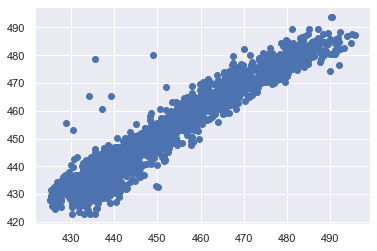

In [91]:
#plot on prdtion
plt.scatter(y_test, y_predict_li)
plt.show()

(419.35384974999386,
 499.72715803772036,
 419.35384974999386,
 499.72715803772036)

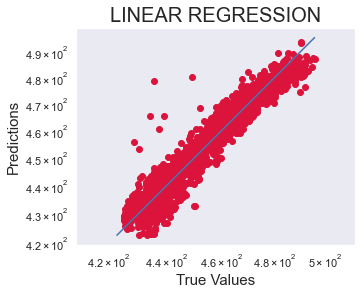

In [92]:
plt.figure(figsize=(5,4))
plt.scatter(y_test, y_predict_li, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_predict_li), max(y_test))
p2 = min(min(y_predict_li), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('LINEAR REGRESSION',fontsize=20)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')

In [93]:
#testing Accuracy
test_data_model_score=reg.score(x_test,y_test)
print ('Accuracy of test data: ',test_data_model_score)

#training Accuracy
train_data_model_score=reg.score(x_train,y_train)
print ('Accuracy of train data: ',train_data_model_score)

Accuracy of test data:  0.9250970525865724
Accuracy of train data:  0.9284079315510405


##### Mean Abs Error

In [94]:
from sklearn.metrics import mean_absolute_error
mae1=mean_absolute_error(y_test, y_predict_li)
print("Mean Absolute Error:",round(mae1,4))

Mean Absolute Error: 3.6477


##### Mean sq. error 

In [95]:
from sklearn.metrics import mean_squared_error
mse1=mean_squared_error(y_test, y_predict_li)
print("Mean Squared Error:",round(mse1,4))

Mean Squared Error: 22.4705


##### RMSE

In [96]:
from sklearn.metrics import mean_squared_error
rmse1=np.sqrt(mean_squared_error(y_test, y_predict_li))
print("Root Mean Squared:",round(rmse1,4))

Root Mean Squared: 4.7403


##### Root Mean sq. log error

In [97]:
from sklearn.metrics import mean_squared_log_error
rmsle1=np.sqrt(mean_squared_log_error(y_test, y_predict_li))
print("Root Mean Squared log Error:",round(rmsle1,4))

Root Mean Squared log Error: 0.0105


##### R-Squared

In [98]:
from sklearn.metrics import r2_score
r2score1= r2_score(y_predict_li,y_test)*100
print("Linear Regression R-Squared :",round(r2score1,4))

Linear Regression R-Squared : 92.0148


#### 2.Decision Tree Regressor

In [99]:
DTR = DecisionTreeRegressor(random_state = 0) 
DTR.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [100]:
#for predict the test values
y_predict_dt=DTR.predict(x_test)
y_predict_dt

array([477.76, 442.57, 425.16, ..., 477.78, 434.48, 459.06])

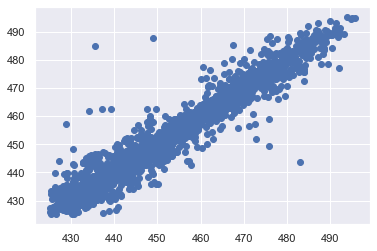

In [101]:
#plot on prdtion
plt.scatter(y_test, y_predict_dt)
plt.show()

(421.8546232350237, 499.5856913545911, 421.8546232350237, 499.5856913545911)

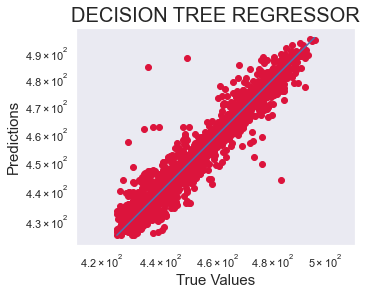

In [102]:
plt.figure(figsize=(5,4))
plt.scatter(y_test, y_predict_dt, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_predict_dt), max(y_test))
p2 = min(min(y_predict_dt), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('DECISION TREE REGRESSOR',fontsize=20)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')

In [103]:
#testing Accuracy
test_data_model_score=DTR.score(x_test,y_test)
print ('Accuarcy of test data',round(test_data_model_score,4))

#Training Accuarcy
train_data_model_score=DTR.score(x_train,y_train)
print ('Accuracy of train data',train_data_model_score)

Accuarcy of test data 0.9263
Accuracy of train data 1.0


##### MAE

In [104]:
from sklearn.metrics import mean_absolute_error
mae2=mean_absolute_error(y_test, y_predict_dt)
print("Mean Absolute Error:",round(mae2,4))

Mean Absolute Error: 3.1314


##### MSE

In [105]:
from sklearn.metrics import mean_squared_error
mse2=mean_squared_error(y_test, y_predict_dt)
print("Mean Squared Error:",round(mse2,4))

Mean Squared Error: 22.1067


##### RMSE

In [106]:
from sklearn.metrics import mean_squared_error
rmse2=np.sqrt(mean_squared_error(y_test, y_predict_dt))
print("Root Mean Squared Error:",round(rmse2,4))

Root Mean Squared Error: 4.7018


##### RMS Log Error

In [107]:
from sklearn.metrics import mean_squared_log_error
rmsle2=np.sqrt(mean_squared_log_error(y_test, y_predict_dt))
print("Root Mean Squared log Error:",round(rmsle2,4))

Root Mean Squared log Error: 0.0103


##### R-Squared

In [108]:
from sklearn.metrics import r2_score
r2score2= r2_score(y_predict_dt,y_test)*100
print("Decision Tree Regressor R-Squared:",round(r2score2,4))

Decision Tree Regressor R-Squared: 92.5721


#### 3.Random Forest

In [109]:
RFR= RandomForestRegressor(n_estimators =50, random_state = 0)
RFR.fit(x_train,y_train)

RandomForestRegressor(n_estimators=50, random_state=0)

In [110]:
#for predict the test values
y_predict_rfr=RFR.predict(x_test)
y_predict_rfr

array([476.667 , 444.5358, 429.449 , ..., 482.9574, 431.6932, 457.7778])

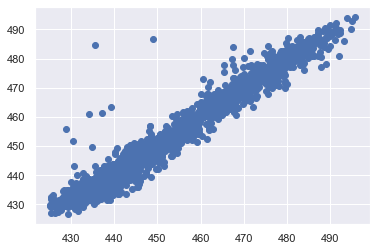

In [111]:
#plot on prdtion
plt.scatter(y_test, y_predict_rfr)
plt.show()

(421.86504283500693, 499.5851037660591, 421.86504283500693, 499.5851037660591)

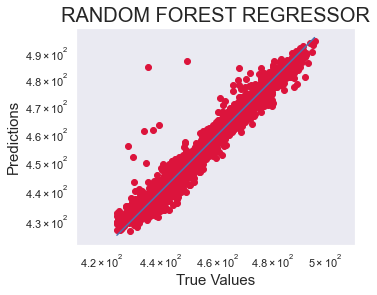

In [112]:
plt.figure(figsize=(5,4))
plt.scatter(y_test, y_predict_rfr, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_predict_rfr), max(y_test))
p2 = min(min(y_predict_rfr), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('RANDOM FOREST REGRESSOR',fontsize=20)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')

In [113]:
#testing Accuracy
test_data_model_score=RFR.score(x_test,y_test)
print ('Accuracy of test data',round(test_data_model_score,4))

#Training Accuracy
train_data_model_score=RFR.score(x_train,y_train)
print ('Accuracy of train data',round(train_data_model_score,4))

Accuracy of test data 0.9568
Accuracy of train data 0.9947


##### MAE

In [114]:
from sklearn.metrics import mean_absolute_error
mae3=mean_absolute_error(y_test, y_predict_rfr)
print("Mean Absolute Error:",round(mae3,4))

Mean Absolute Error: 2.379


##### MSE

In [115]:
from sklearn.metrics import mean_squared_error
mse3=mean_squared_error(y_test, y_predict_rfr)
print("Mean Squared Error:",round(mse3,4))

Mean Squared Error: 12.9512


##### RMSE

In [116]:
from sklearn.metrics import mean_squared_error
rmse3=np.sqrt(mean_squared_error(y_test, y_predict_rfr))
print("Root Mean Squared Error:",round(rmse3,4))

Root Mean Squared Error: 3.5988


#####  Log Error

In [117]:
rmsle3=np.sqrt(mean_squared_log_error(y_test, y_predict_rfr))
print("Root Mean Squared Log Error:",round(rmsle3,4))

Root Mean Squared Log Error: 0.0079


##### R-Squared

In [118]:

r2score3= r2_score(y_predict_rfr,y_test)*100
print("Random Forest Regressor R-Squared:",round(r2score3,4))

Random Forest Regressor R-Squared: 95.5156


#### 4.Gradient Boosting

In [119]:
GBR = GradientBoostingRegressor(learning_rate=0.1,n_estimators=100) 
GBR.fit(x_train,y_train)

GradientBoostingRegressor()

In [120]:
#for predict the test values
y_predict_gbr=GBR.predict(x_test)
y_predict_gbr

array([476.68837124, 444.62344598, 431.32780899, ..., 485.93785762,
       432.35107973, 457.02934987])

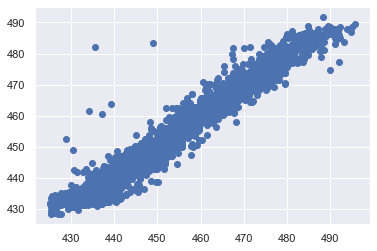

In [121]:
#plot on prdtion
plt.scatter(y_test, y_predict_gbr)
plt.show()

(421.86504283500693, 499.5851037660591, 421.86504283500693, 499.5851037660591)

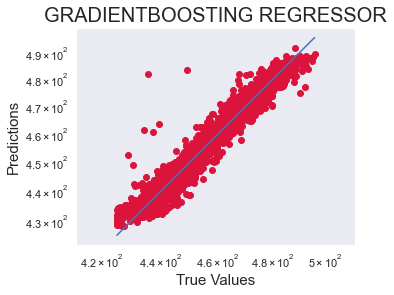

In [122]:
plt.figure(figsize=(5,4))
plt.scatter(y_test, y_predict_gbr, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_predict_gbr), max(y_test))
p2 = min(min(y_predict_gbr), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('GRADIENTBOOSTING REGRESSOR',fontsize=20)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')

In [123]:
#testing Accuarcy
test_data_model_score=GBR.score(x_test,y_test)
print ('Accuracy of test data',round(test_data_model_score,4))

#Training Accuracy
train_data_model_score=GBR.score(x_train,y_train)
print ('Accuracy of train data',round(train_data_model_score,4))

Accuracy of test data 0.9448
Accuracy of train data 0.9535


##### MAE

In [124]:
mae4=mean_absolute_error(y_test, y_predict_gbr)
print("Mean Absolute error:",round(mae4,4))

Mean Absolute error: 2.9859


##### MSE

In [125]:
mse4=mean_squared_error(y_test, y_predict_gbr)
print("Mean Squared error:",round(mse4,4))

Mean Squared error: 16.5603


##### RMSE

In [126]:
rmse4=np.sqrt(mean_squared_error(y_test, y_predict_gbr))
print("Root Mean Squared error:",round(rmse4,4))

Root Mean Squared error: 4.0694


##### Log Error

In [127]:
rmsle4=np.sqrt(mean_squared_log_error(y_test, y_predict_gbr))
print("Root Mean Squared log error:",round(rmsle4,4))

Root Mean Squared log error: 0.0089


##### R-Squared

In [128]:
r2score4= r2_score(y_predict_gbr,y_test)*100
print("Gradient Boosting Regressor:",round(r2score4,4))

Gradient Boosting Regressor: 94.1441


#### Support Vector Regressor

In [129]:
SVR=SVR(kernel='linear')
SVR.fit(x_train,y_train)

SVR(kernel='linear')

In [130]:
#for predict the test values
y_predict_svr=SVR.predict(x_test)
y_predict_svr

array([477.8637649 , 449.07301746, 426.16393402, ..., 484.31405749,
       432.88860377, 455.11962162])

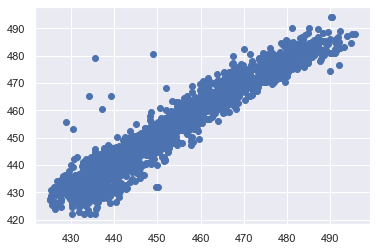

In [131]:
#plot on prdtion
plt.scatter(y_test, y_predict_svr)
plt.show()

(418.5352164089279, 499.77365953128907, 418.5352164089279, 499.77365953128907)

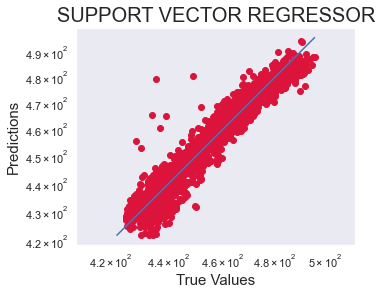

In [132]:
plt.figure(figsize=(5,4))
plt.scatter(y_test, y_predict_svr, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_predict_svr), max(y_test))
p2 = min(min(y_predict_svr), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('SUPPORT VECTOR REGRESSOR',fontsize=20)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')

In [133]:
#testing Accuracy
test_data_model_score=SVR.score(x_test,y_test)
print ('Accuracy of test data',round(test_data_model_score,4))

#Training Accuarcy
train_data_model_score=SVR.score(x_train,y_train)
print ('accuracy of train data',round(train_data_model_score,4))

Accuracy of test data 0.9246
accuracy of train data 0.928


##### MAE

In [134]:
mae5=mean_absolute_error(y_test, y_predict_svr)
print("Mean Absolute Error:",round(mae5,4))

Mean Absolute Error: 3.6354


##### MSE

In [135]:
mse5=mean_squared_error(y_test, y_predict_svr)
print("Mean Squared Error:",round(mse5,4))

Mean Squared Error: 22.6263


#####  RMSE 

In [136]:
rmse5=np.sqrt(mean_squared_error(y_test, y_predict_svr))
print("Root Mean Squared Error:",round(rmse5,4))

Root Mean Squared Error: 4.7567


##### Log Error

In [137]:
rmsle5=np.sqrt(mean_squared_log_error(y_test, y_predict_svr))
print("Root Mean Squared log Error:",round(rmsle5,4))

Root Mean Squared log Error: 0.0105


##### R-Squared

In [138]:
r2score5= r2_score(y_predict_svr,y_test)*100
print("Support Vector Regressor R-Squared:",round(r2score5,4))

Support Vector Regressor R-Squared: 92.2449


#### 6.XGBOOST

In [139]:
XGB=xgb.XGBRegressor(n_estimators=100,eta=0.001,gamma=10,learning_rate=0.5)
XGB.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             eta=0.001, gamma=10, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.5, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [140]:
#for predict the test values
y_predict_xgb=XGB.predict(x_test)
y_predict_xgb

array([475.97754, 444.32382, 431.63113, ..., 484.40372, 431.6131 ,
       457.07477], dtype=float32)

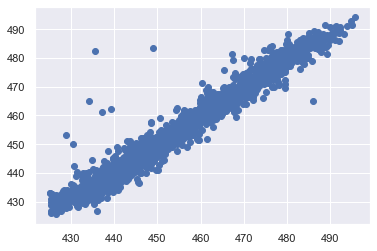

In [141]:
#plot on prdtion
plt.scatter(y_test, y_predict_xgb)
plt.show()

(421.86504283500693, 499.5851037660591, 421.86504283500693, 499.5851037660591)

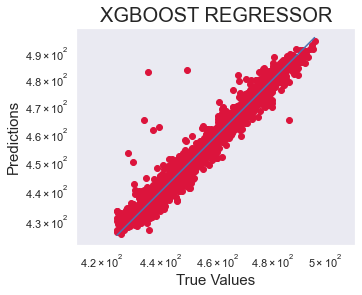

In [142]:
plt.figure(figsize=(5,4))
plt.scatter(y_test, y_predict_xgb, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_predict_xgb), max(y_test))
p2 = min(min(y_predict_xgb), min(y_test))
plt.title('XGBOOST REGRESSOR',fontsize=20)
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')

In [143]:
#testing Accuaracy
test_data_model_score=XGB.score(x_test,y_test)
print ('Accuracy of test data',round(test_data_model_score,4))

#Training Accuaracy
train_data_model_score=XGB.score(x_train,y_train)
print ('Accuracy of train data',round(train_data_model_score,4))

Accuracy of test data 0.9589
Accuracy of train data 0.9835


##### MAE

In [144]:
mae6=mean_absolute_error(y_test, y_predict_xgb)
print("Mean Absolute Error:",round(mae6,4))

Mean Absolute Error: 2.3716


##### MSE

In [145]:
mse6=mean_squared_error(y_test, y_predict_xgb)
print("Mean Squared Error:",round(mse6,4))

Mean Squared Error: 12.3414


##### RMSE

In [146]:
rmse6=np.sqrt(mean_squared_error(y_test, y_predict_xgb))
print("Root Mean Squared Error:",round(rmse6,4))

Root Mean Squared Error: 3.513


##### Log Error

In [147]:
rmsle6=np.sqrt(mean_squared_log_error(y_test, y_predict_xgb))
print("Root Mean Squared log Error:",round(rmsle6,4))

Root Mean Squared log Error: 0.0077


##### R-Squared

In [148]:
r2score6= r2_score(y_predict_xgb,y_test)*100
print("XGBoost R-Squaredr2:",round(r2score6,4))

XGBoost R-Squaredr2: 95.7514


#### 7.Ridge Regressor

In [149]:
RG= Ridge(alpha=0.01) 
RG.fit(x_train,y_train)

Ridge(alpha=0.01)

In [150]:
#for predict the test values
y_predict_rg=RG.predict(x_test)
y_predict_rg

array([477.73726778, 449.23943033, 426.7793135 , ..., 483.78689511,
       433.28497665, 455.03214846])

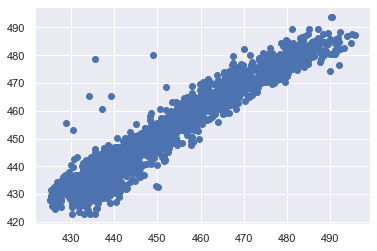

In [151]:
#plot on predtion
plt.scatter(y_test, y_predict_rg)
plt.show()

(419.35388329227334,
 499.72715613434013,
 419.35388329227334,
 499.72715613434013)

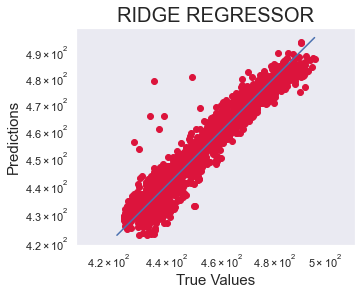

In [152]:
plt.figure(figsize=(5,4))
plt.scatter(y_test, y_predict_rg, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_predict_rg), max(y_test))
p2 = min(min(y_predict_rg), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title("RIDGE REGRESSOR",fontsize=20)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')

In [153]:
#Testing Accuracy
test_data_model_score=RG.score(x_test,y_test)
print ('Accuracy of test data',round(test_data_model_score,4))

#Training Accuracy
train_data_model_score=RG.score(x_train,y_train)
print ('Accuarcy of train data',round(train_data_model_score,4))

Accuracy of test data 0.9251
Accuarcy of train data 0.9284


##### MAE

In [154]:
mae7=mean_absolute_error(y_test, y_predict_rg)
print("Mean Absolute Error",round(mae7,4))

Mean Absolute Error 3.6477


##### MSE

In [155]:
mse7=mean_squared_error(y_test, y_predict_rg)
print("Mean Squared Error",round(mse7,4))

Mean Squared Error 22.4705


##### RMSE

In [156]:
rmse7=np.sqrt(mean_squared_error(y_test, y_predict_rg))
print("Root Mean Squared Error",round(rmse7,4))

Root Mean Squared Error 4.7403


##### Log Error

In [157]:
rmsle7=np.sqrt(mean_squared_log_error(y_test, y_predict_rg))
print("Root Mean Squared log Error",round(rmsle7,4))

Root Mean Squared log Error 0.0105


##### R-Squared

In [158]:
r2score7= r2_score(y_predict_rg,y_test)*100
print("Ridge Regressor R-Squared",round(r2score7,4))

Ridge Regressor R-Squared 92.0147


#### 8.Lasso Regressor

In [159]:
LSR = Lasso(alpha=4)
LSR.fit(x_train,y_train)

Lasso(alpha=4)

In [160]:
#for predict the test values
y_predict_lsr=LSR.predict(x_test)
y_predict_lsr

array([469.9691299 , 451.4624633 , 434.93398885, ..., 476.76131161,
       440.3141127 , 457.11508812])

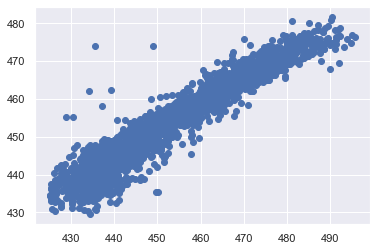

In [161]:
#plot on prdtion
plt.scatter(y_test, y_predict_lsr)
plt.show()

(421.86504283500693, 499.5851037660591, 421.86504283500693, 499.5851037660591)

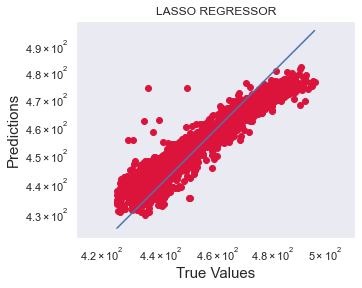

In [162]:
plt.figure(figsize=(5,4))
plt.scatter(y_test, y_predict_lsr, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_predict_lsr), max(y_test))
p2 = min(min(y_predict_lsr), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('LASSO REGRESSOR')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')

In [163]:
#testing Accuracy
test_data_model_score=LSR.score(x_test,y_test)
print ('Accuracy of test data',round(test_data_model_score,4))

#Training Accuracy
train_data_model_score=LSR.score(x_train,y_train)
print ('Accuracy of train data',round(train_data_model_score,4))

Accuracy of test data 0.8507
Accuracy of train data 0.8542


##### MAE

In [164]:
mae8=mean_absolute_error(y_test, y_predict_lsr)
print("Mean Absolute Error:",round(mae8,4))

Mean Absolute Error: 5.4023


##### MSE

In [165]:
mse8=mean_squared_error(y_test, y_predict_lsr)
print("Mean squared Error:",round(mse8,4))

Mean squared Error: 44.7803


##### RMSE 

In [166]:
rmse8=np.sqrt(mean_squared_error(y_test, y_predict_lsr))
print("Root Mean squared Error:",round(rmse8,4))

Root Mean squared Error: 6.6918


##### Log Error 

In [167]:
rmsle8=np.sqrt(mean_squared_log_error(y_test, y_predict_lsr))
print("Root Mean squared log Error:",round(rmsle8,4))

Root Mean squared log Error: 0.0146


#### R-Squared

In [168]:
r2score8= r2_score(y_predict_lsr,y_test)*100
print("Lasso regressor R-Squared:",round(r2score8,4))

Lasso regressor R-Squared: 70.6815


#### 9.KNN

In [169]:
knn = KNeighborsRegressor(n_neighbors=5, p=2) # k =5 # p=2 --> Eucledian distance
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [170]:
#for predict the test values
y_predict_knn=knn.predict(x_test)
y_predict_knn

array([475.332, 445.174, 431.074, ..., 483.008, 432.826, 459.672])

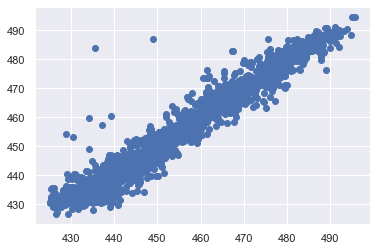

In [171]:
#plot on prdtion
plt.scatter(y_test, y_predict_knn)
plt.show()

(421.86504283500693, 499.5851037660591, 421.86504283500693, 499.5851037660591)

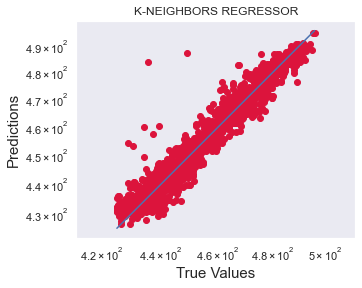

In [172]:
plt.figure(figsize=(5,4))
plt.scatter(y_test, y_predict_knn, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_predict_knn), max(y_test))
p2 = min(min(y_predict_knn), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('K-NEIGHBORS REGRESSOR')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')

In [173]:
#testing score
test_data_model_score=knn.score(x_test,y_test)
print ('Accuracy of test data',round(test_data_model_score,4))

train_data_model_score=knn.score(x_train,y_train)
print ('Accuracy of train data',round(train_data_model_score,4))

Accuracy of test data 0.946
Accuracy of train data 0.9688


##### MAE

In [174]:
mae9=mean_absolute_error(y_test, y_predict_knn)
print("Mean Absolute error:",round(mae9,4))

Mean Absolute error: 2.7687


##### MSE

In [175]:
mse9=mean_squared_error(y_test, y_predict_knn)
print("Mean Squared error:",round(mse9,4))

Mean Squared error: 16.1979


##### RMSE

In [176]:
rmse9=np.sqrt(mean_squared_error(y_test, y_predict_knn))
print("Root Mean Squared error:",round(rmse9,4))

Root Mean Squared error: 4.0247


##### Log Error

In [177]:
rmsle9=np.sqrt(mean_squared_log_error(y_test, y_predict_knn))
print("Root Mean Squared log error:",round(rmsle9,4))

Root Mean Squared log error: 0.0089


##### R-Squared

In [178]:
r2score9= r2_score(y_predict_knn,y_test)*100
print("K-Neighbors R-Squared:",round(r2score9,4))

K-Neighbors R-Squared: 94.43


#### 10.ADABOOST Regressor

In [179]:
AB = AdaBoostRegressor(base_estimator=DTR,n_estimators=100)
AB.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(random_state=0),
                  n_estimators=100)

In [180]:
#for predict the test values
y_predict_ab=knn.predict(x_test)
y_predict_ab

array([475.332, 445.174, 431.074, ..., 483.008, 432.826, 459.672])

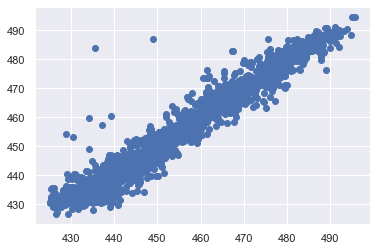

In [181]:
#plot on prdtion
plt.scatter(y_test, y_predict_ab)
plt.show()

(421.86504283500693, 499.5851037660591, 421.86504283500693, 499.5851037660591)

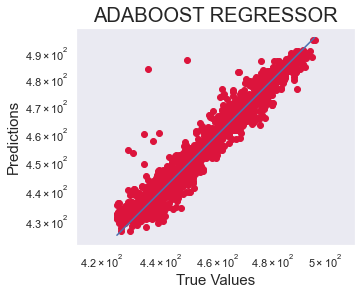

In [182]:
plt.figure(figsize=(5,4))
plt.scatter(y_test, y_predict_ab, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_predict_ab), max(y_test))
p2 = min(min(y_predict_ab), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('ADABOOST REGRESSOR',fontsize=20)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')

In [183]:
#testing score
test_data_model_score=AB.score(x_test,y_test)
print ('Accuracy of test data',round(test_data_model_score,4))

train_data_model_score=AB.score(x_train,y_train)
print ('Accuracy of test data',round(train_data_model_score,4))

Accuracy of test data 0.9593
Accuracy of test data 0.9999


##### MAE

In [184]:
mae10=mean_absolute_error(y_test, y_predict_ab)
print("Mean Absolute Error:",round(mae10,4))

Mean Absolute Error: 2.7687


##### MSE

In [185]:
mse10=mean_squared_error(y_test, y_predict_ab)
print("Mean squared Error:",round(mse10,4))

Mean squared Error: 16.1979


##### RMSE

In [186]:
rmse10=np.sqrt(mean_squared_error(y_test, y_predict_ab))
print("Root Mean squared Error:",round(rmse10,4))

Root Mean squared Error: 4.0247


##### Log Error

In [187]:
rmsle10=np.sqrt(mean_squared_log_error(y_test, y_predict_ab))
print("Root Mean squared log Error:",round(rmsle10,4))

Root Mean squared log Error: 0.0089


##### R-Squared

In [188]:
r2score10= r2_score(y_predict_ab,y_test)*100
print("AdaBoost Regerssor R-Squared:",round(r2score10,4))

AdaBoost Regerssor R-Squared: 94.43


In [195]:
#tabulating the values

data={'Model':pd.Series(['LinearRegression','DecisionTree_Regressor','RandomForest_Regressor','Gradientboosting_regressor','supportvector_regressor','XGB_Regressor','Ridge_regressor','Lasso_regressor','KNeighbors_Regressor','AdaBoost_Regressor']),'RMSE':pd.Series([rmse1,rmse2,rmse3,rmse4,rmse5,rmse6,rmse7,rmse8,rmse9,rmse10]),
      'R2SCORES':pd.Series([r2score1,r2score2,r2score3,r2score4,r2score5,r2score6,r2score7,r2score8,r2score9,r2score10]),'MAE':pd.Series([mae1,mae2,mae3,mae4,mae5,mae6,mae7,mae8,mae9,mae10]),'RMSLE':pd.Series([rmsle1,rmsle2,rmsle3,rmsle4,rmsle5,rmsle6,rmsle7,rmsle8,rmsle9,rmsle10]),
      'MSE':pd.Series([mse1,mse2,mse3,mse4,mse5,mse6,mse7,mse8,mse9,mse10])}
pd.DataFrame(data)

,Model,RMSE,R2SCORES,MAE,RMSLE,MSE
0,LinearRegression,4.740305,92.014760,3.647706,0.010458,22.470496
1,DecisionTree_Regressor,4.701776,92.572051,3.131385,0.010340,22.106694
2,RandomForest_Regressor,3.598774,95.515563,2.378980,0.007898,12.951173
3,Gradientboosting_regressor,4.069440,94.144143,2.985866,0.008939,16.560344
4,supportvector_regressor,4.756711,92.244950,3.635397,0.010507,22.626297
5,XGB_Regressor,3.513038,95.751439,2.371584,0.007714,12.341438
6,Ridge_regressor,4.740304,92.014744,3.647707,0.010458,22.470482
7,Lasso_regressor,6.691811,70.681508,5.402325,0.014621,44.780330
8,KNeighbors_Regressor,4.024661,94.430003,2.768667,0.008856,16.197893
9,AdaBoost_Regressor,4.024661,94.430003,2.768667,0.008856,16.197893


In [196]:
RESULTS=pd.DataFrame(data)
RESULTS
RESULTS.sort_values(['RMSE','R2SCORES'])

,Model,RMSE,R2SCORES,MAE,RMSLE,MSE
5,XGB_Regressor,3.513038,95.751439,2.371584,0.007714,12.341438
2,RandomForest_Regressor,3.598774,95.515563,2.378980,0.007898,12.951173
8,KNeighbors_Regressor,4.024661,94.430003,2.768667,0.008856,16.197893
9,AdaBoost_Regressor,4.024661,94.430003,2.768667,0.008856,16.197893
3,Gradientboosting_regressor,4.069440,94.144143,2.985866,0.008939,16.560344
1,DecisionTree_Regressor,4.701776,92.572051,3.131385,0.010340,22.106694
6,Ridge_regressor,4.740304,92.014744,3.647707,0.010458,22.470482
0,LinearRegression,4.740305,92.014760,3.647706,0.010458,22.470496
4,supportvector_regressor,4.756711,92.244950,3.635397,0.010507,22.626297
7,Lasso_regressor,6.691811,70.681508,5.402325,0.014621,44.780330


In [197]:
import pickle
from pickle import dump

In [201]:
pickle.dump(XGB,open('model_xgb.pkl','wb'))